# Classification Algorithms
- Naive Bayes
- Decision Tree
- Random Forest
- Support Vector Machine

# ML Techniques
- encoding
- splitting training and testing data
- scaling/ normalizing

## Naive Bayes
algoritma berbasis probabilitas dan asumsi bahwa satu fitur tidak mempengaruhi fitur lain

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

In [2]:
def visualCM(y, y_pred, total_label=2, title=""):
  cm = confusion_matrix(y, y_pred)
  fig, ax = plt.subplots(figsize=(total_label, total_label))
  ax.imshow(cm)
  ax.grid(False)
  ticks = range(0, total_label)
  ax.xaxis.set(ticks=ticks, ticklabels=ticks)
  ax.yaxis.set(ticks=ticks, ticklabels=ticks)
  ax.set_ylim(total_label-0.5, -0.5)
  for i in range(total_label):
      for j in range(total_label):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
  plt.title(title)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

### review function di python

In [3]:
# membuat function, kumpulan code, kita kasih nama "halo"
def halo(nama, umur, tempat="kantor"):
  # kumpulan code ini menerima minimal 2 input yang harus diisi, yaitu "nama" dan "umur"
  # "tempat" kalau tidak dikasih, akan diisi sebagai kantor, kalau dikasih bagus
  print("selamat datang", nama)
  print("di", tempat)
  if (umur >= 60):
    print("special pass nya di sebelah sini.")

halo("andi", 35)

selamat datang andi
di kantor


In [4]:
halo("budi", 75, "rumah")

selamat datang budi
di rumah
special pass nya di sebelah sini.


# ----

In [5]:
# 1. import data
# kita gunakan test data yang ada di kode.id

weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

df_wp = pd.DataFrame({"weather": weather, "temp":temp, "play":play})
df_wp

,weather,temp,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


In [6]:
# 2. data preparation
# karena data bersifat text, maka kita perlu encode menjadi numerik

# siapin tempat data yang sudah diubah jadi numerik
df_wp2 = df_wp.copy()

le = LabelEncoder()
df_wp2['weather'] = le.fit_transform(df_wp['weather'])

label_legend = {}
label_legend['weather'] = le.classes_
print(le.classes_)

['Overcast' 'Rainy' 'Sunny']


di contoh diatas, LabelEncoder kita le, mengubah 'Overcast' menjadi 0, 'Rainy' menjadi 1, dan 'Sunny' menjadi 2

kita lakukan hal yang sama dengan temp dan play karena mereka juga data text

In [7]:
le = LabelEncoder()
df_wp2['temp'] = le.fit_transform(df_wp['temp'])

label_legend['temp'] = le.classes_
print(le.classes_)

le = LabelEncoder()
df_wp2['play'] = le.fit_transform(df_wp['play'])

label_legend['play'] = le.classes_
print(le.classes_)

['Cool' 'Hot' 'Mild']
['No' 'Yes']


In [8]:
df_wp2

,weather,temp,play
0,2,1,0
1,2,1,0
2,0,1,1
3,1,2,1
4,1,0,1
5,1,0,0
6,0,0,1
7,2,2,0
8,2,0,1
9,1,2,1


In [9]:
label_legend

{'weather': array(['Overcast', 'Rainy', 'Sunny'], dtype=object),
 'temp': array(['Cool', 'Hot', 'Mild'], dtype=object),
 'play': array(['No', 'Yes'], dtype=object)}

kita sudah berhasil melakukan encoding untuk 3 kolom data.

In [10]:
df_wp2[['weather', 'temp']]

,weather,temp
0,2,1
1,2,1
2,0,1
3,1,2
4,1,0
5,1,0
6,0,0
7,2,2
8,2,0
9,1,2


itu fitur kita, 2 kolom

In [11]:
df_wp2['play']

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

dan itu targetnya, play 1 atau tidak 0

In [12]:
# 3. membuat dan melatih model
# model untuk menebak apakah play/tidak saat weather dan temp tertentu
model_nb_wp = GaussianNB()
model_nb_wp.fit(df_wp2[['weather', 'temp']], df_wp2['play'])

GaussianNB()

In [13]:
# kita bisa gunakan model untuk membuat prediksi
# kita bisa input weather dan temp tertentu, dan model akan menebak apakah orang akan play/tidak

label_legend

{'weather': array(['Overcast', 'Rainy', 'Sunny'], dtype=object),
 'temp': array(['Cool', 'Hot', 'Mild'], dtype=object),
 'play': array(['No', 'Yes'], dtype=object)}

In [14]:
# contohnya, di hari hujan Rainy, dan dingin Cool, kira2 orgnya bakal main atau tidak?
# Rainy adalah 1
# Cool adalah 0
# fitur kita weather duluan baru temp, jadi kita inputnya [1,0]

model_nb_wp.predict([[1,0]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

model ini bilang kalau saat Rainy dan Cool, maka orang tersebut akan pergi main, play 1, Yes

In [15]:
# 4. evaluasi model

y_pred = model_nb_wp.predict(df_wp2[['weather', 'temp']])
y = df_wp2['play']

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14



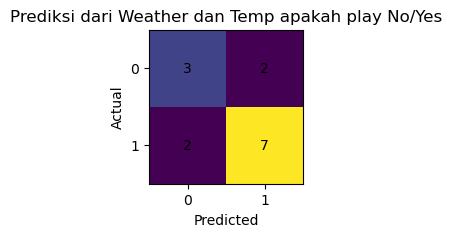

In [16]:
visualCM(y, y_pred, 2, "Prediksi dari Weather dan Temp apakah play No/Yes")

# Decision Tree
decision tree memisahkan data kita dengan pertanyaan yes/no.

setiap pertanyaan adalah sebuah node

setiap ujung adalah sebuah leaf


In [17]:
# 1. import data

df_diabetes = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/diabetes.csv")
df_diabetes.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [18]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
# 2. rapiin data
# pilih data fitur yang mana, target yang mana
# misalkan, untuk fitur kita gunakan glucose dan insulin saja, target tetap Outcome nya (diabetes 1 atau tidak 0)

fitur = df_diabetes[['Glucose', 'Insulin']]
target = df_diabetes['Outcome']

# split data jadi training dan testing data
x_train, x_test, y_train, y_test = train_test_split(fitur, target, test_size=0.2, random_state=0)

In [20]:
# 3. buat dan latih model
model_dt_diabet = DecisionTreeClassifier(max_depth=1)
model_dt_diabet.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [21]:
# prediksi pakai model
# kalau seseorang punya Glucose 121 dan Insulin 80, apakah dia punya diabetes?
# model kita memprediksi
model_dt_diabet.predict([[121, 80]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

model kita memprediksi seseorang dengan Glucose 121 dan Insulin 80 tidak memiliki penyakit diabetes

In [22]:
# optional, membuat visualisasi decision tree

In [23]:
#pip install graphviz

selain pip install, bisa juga gunakan
```python
conda install -c anaconda graphviz
```
biasanya environment variable terpasang dengan otomatis menggunakan conda

In [24]:
#pip install pydotplus

In [25]:
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz( model_dt_diabet,
                      out_file=dot_data,
                      class_names=['Sehat','Diabet'], # the target names.
                      feature_names=['Glucose', 'Insulin'], # the feature names.
                      filled=True, # Whether to fill in the boxes with colours.
                      rounded=True, # Whether to round the corners of the boxes.
                      special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
# 4. evaluasi model
y_pred = model_dt_diabet.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       107
           1       0.53      0.68      0.60        47

    accuracy                           0.72       154
   macro avg       0.69      0.71      0.69       154
weighted avg       0.75      0.72      0.73       154



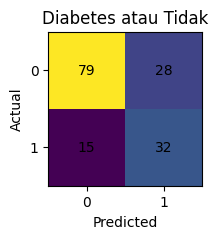

In [ ]:
visualCM(y_test, y_pred, 2, "Diabetes atau Tidak")

# Random Forest
membuat banyak decision tree, secara default 100 decision tree berbeda lalu menggunakan pohon2 tersebut untuk voting, data yang mau di prediksi ini, targetnya brp.

misalkan dari 100 pohon, 57 bilang kategori A, 30 bilang kategori B, 13 bilang kategori C, ya berarti prediksinya adalah kategori A

In [ ]:
# data tadi sudah kita rapikan
# 3. buat dan latih model

model_rf_diabet = RandomForestClassifier(max_depth=3)
model_rf_diabet.fit(x_train, y_train)

RandomForestClassifier(max_depth=3)

random forest punya informasi feature_importances_ yang menunjukkan setiap fitur seberapa berpengaruh ke perubahan target

In [ ]:
model_rf_diabet.feature_importances_

array([0.76095972, 0.23904028])

In [ ]:
pd.DataFrame(index=['Glucose', 'Insulin'], data = model_rf_diabet.feature_importances_, columns=['Feature Importance'])

,Feature Importance
Glucose,0.76096
Insulin,0.23904


In [ ]:
# 4. evaluasi model
y_pred = model_rf_diabet.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       107
           1       0.68      0.45      0.54        47

    accuracy                           0.77       154
   macro avg       0.73      0.68      0.69       154
weighted avg       0.75      0.77      0.75       154



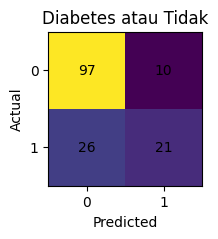

In [ ]:
visualCM(y_test, y_pred, 2, "Diabetes atau Tidak")

# Support Vector Machine
ada beberapa hal yang terjadi di model tipe Support Vector Machine

1. plot semua data di graph (seperti KNN)
2. dia memisahkan data dengan kernel secara linear, polynomial, atau [radial](https://miro.medium.com/v2/resize:fit:838/1*gXvhD4IomaC9Jb37tzDUVg.png)
3. data yang sudah terpisah, dicarikan pemisah nya menggunakan garis di graph
  - pemisah dibuat random, dan tidak optimal, cari lagi pemisah baru yg lebih optimal
  - ulangi sampai dapat pemisah yang optimal, dengan margin tertinggi


In [ ]:
# gunakan data yang sama
# 3. buat dan latih model
model_svc_diabet = SVC()
model_svc_diabet.fit(x_train, y_train)

SVC()

In [ ]:
# 4. evaluasi model
y_pred = model_svc_diabet.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       107
           1       0.71      0.43      0.53        47

    accuracy                           0.77       154
   macro avg       0.75      0.68      0.69       154
weighted avg       0.76      0.77      0.75       154



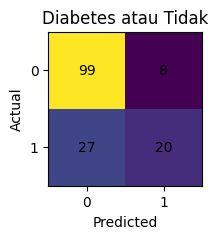

In [ ]:
visualCM(y_test, y_pred, 2, "Diabetes atau Tidak")